In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.impute import KNNImputer 
#from sklearn.tree import DecisionTreeClassifier

In [2]:
Depression = pd.read_csv("Deepression.csv")
Depression.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


In [3]:
Depression.drop(columns = ['Number '],inplace=True)

In [4]:
Depression.shape

(813, 15)

In [5]:
Depression.dtypes

Sleep                float64
Appetite             float64
Interest             float64
Fatigue              float64
Worthlessness        float64
Concentration        float64
Agitation            float64
Suicidal Ideation    float64
Sleep Disturbance    float64
Aggression           float64
Panic Attacks        float64
Hopelessness         float64
Restlessness         float64
Low Energy           float64
Depression State      object
dtype: object

In [6]:
Depression.isna().sum()

Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [7]:
mode = Depression['Depression State'].mode()[0]
Depression.fillna({'Depression State': mode}, inplace=True)

In [8]:
num_cols = [
    'Sleep', 'Appetite', 'Interest', 'Fatigue', 'Worthlessness',
    'Concentration', 'Agitation', 'Suicidal Ideation', 'Sleep Disturbance', 'Aggression',
    'Panic Attacks', 'Hopelessness', 'Restlessness', 'Low Energy'
]

def fill_with_mode(column):
    mode = column.mode()
    if not mode.empty:
        return column.fillna(mode[0])
    return column

Depression[num_cols] = Depression[num_cols].apply(fill_with_mode)

In [9]:
Depression.isna().sum()

Sleep                0
Appetite             0
Interest             0
Fatigue              0
Worthlessness        0
Concentration        0
Agitation            0
Suicidal Ideation    0
Sleep Disturbance    0
Aggression           0
Panic Attacks        0
Hopelessness         0
Restlessness         0
Low Energy           0
Depression State     0
dtype: int64

In [10]:
print(Depression['Depression State'].unique())

['Mild' 'Moderate' 'Severe' 'No depression' '\tModerate' '\tMild'
 '\tNo depression' '\tSevere' '2\tNo depression' '5\tNo depression']


In [11]:
Depression['Depression State'] = (
    Depression['Depression State']
    .str.strip()
    .str.replace(r'^\d+', '', regex = True)
    .str.strip()
)
print(Depression['Depression State'].unique())

['Mild' 'Moderate' 'Severe' 'No depression']


In [12]:
Depression.describe()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,3.613776,3.523985,3.528905,3.648216,3.643296,3.523985,3.650677,3.648216,3.541205,3.658057,3.662977,3.648216,3.648216,3.621156
std,1.725899,1.722347,1.723701,1.704597,1.715101,1.720917,1.698591,1.708927,1.701879,1.696468,1.685806,1.701705,1.708927,1.715374
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [13]:
Depression.describe().T

,count,mean,std,min,25%,50%,75%,max
Sleep,813.0,3.613776,1.725899,1.0,2.0,5.0,5.0,6.0
Appetite,813.0,3.523985,1.722347,1.0,2.0,5.0,5.0,5.0
Interest,813.0,3.528905,1.723701,1.0,2.0,5.0,5.0,5.0
Fatigue,813.0,3.648216,1.704597,1.0,2.0,5.0,5.0,6.0
Worthlessness,813.0,3.643296,1.715101,1.0,2.0,5.0,5.0,6.0
Concentration,813.0,3.523985,1.720917,1.0,2.0,5.0,5.0,5.0
Agitation,813.0,3.650677,1.698591,1.0,2.0,5.0,5.0,6.0
Suicidal Ideation,813.0,3.648216,1.708927,1.0,2.0,5.0,5.0,6.0
Sleep Disturbance,813.0,3.541205,1.701879,1.0,2.0,5.0,5.0,5.0
Aggression,813.0,3.658057,1.696468,1.0,2.0,5.0,5.0,6.0


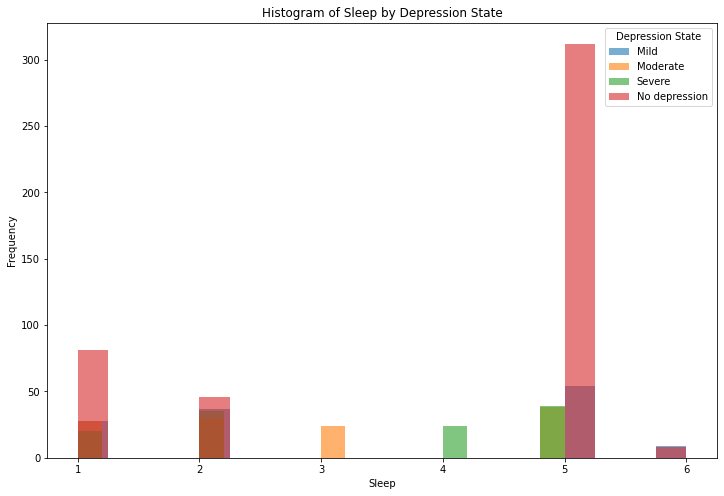

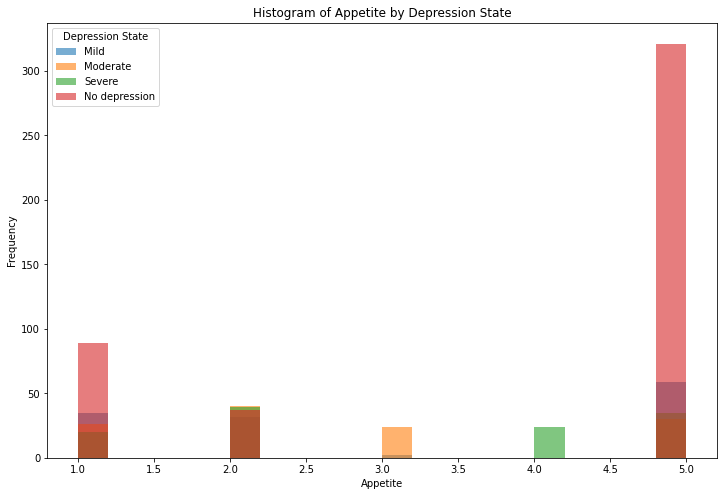

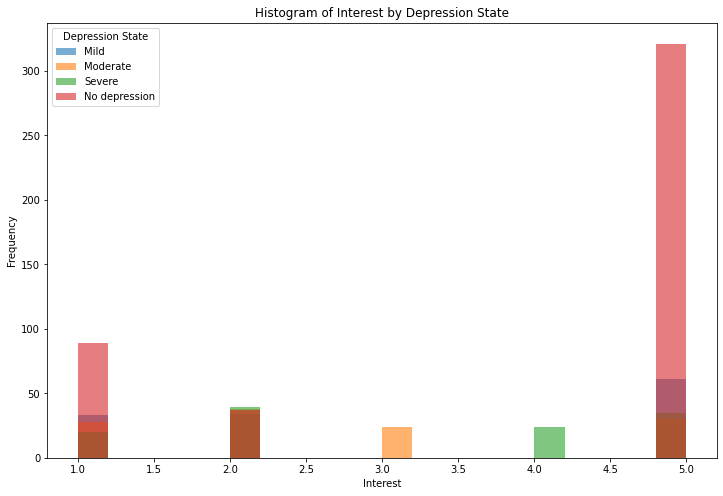

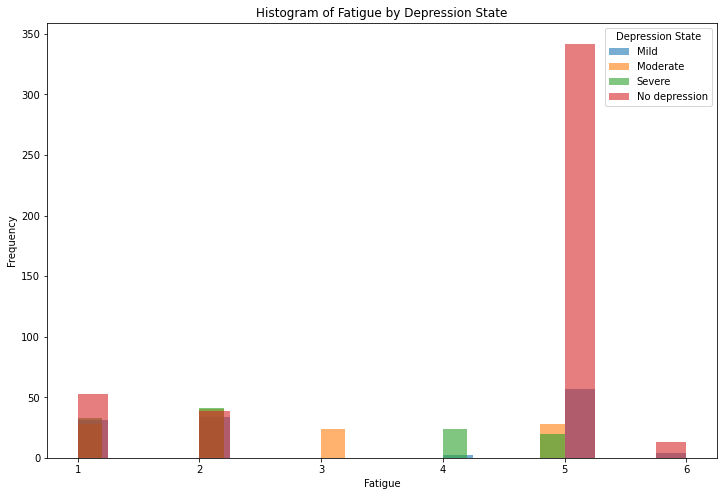

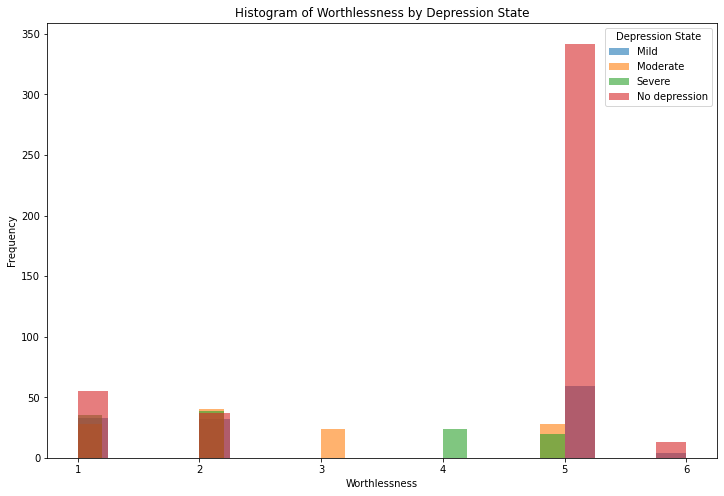

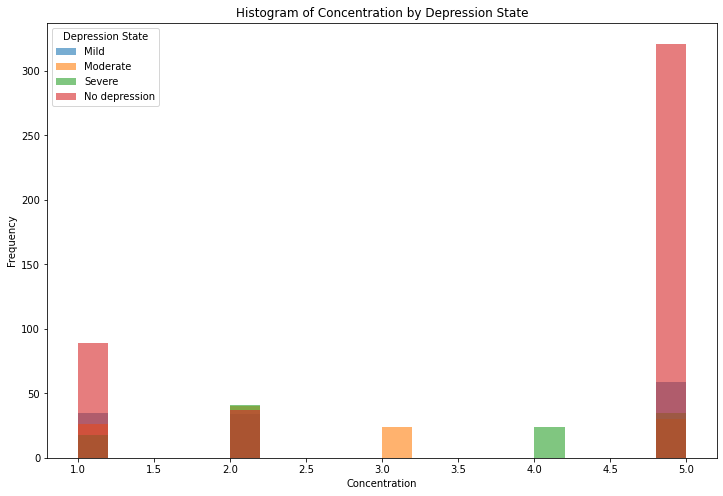

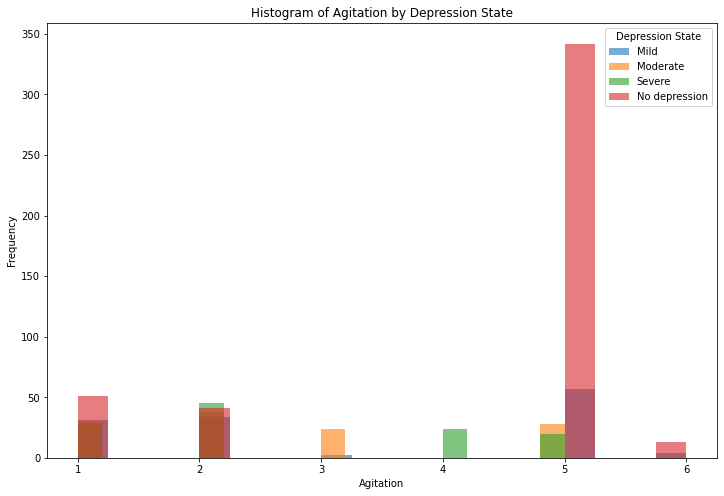

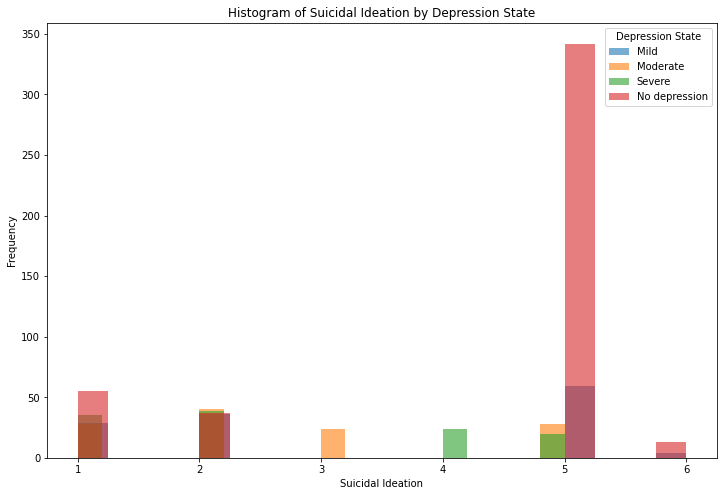

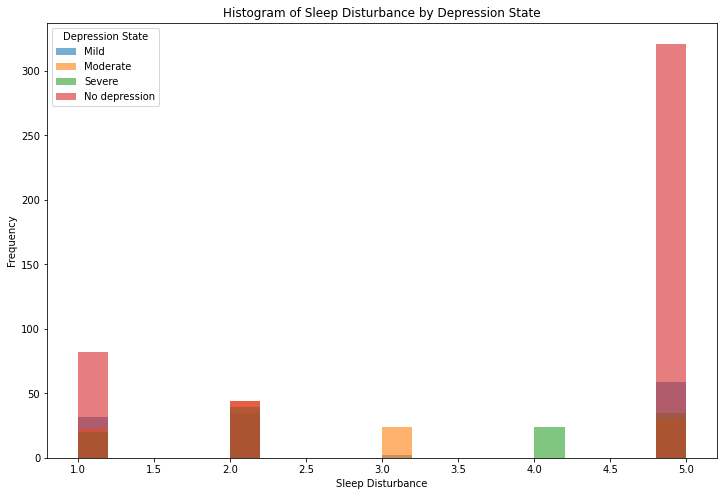

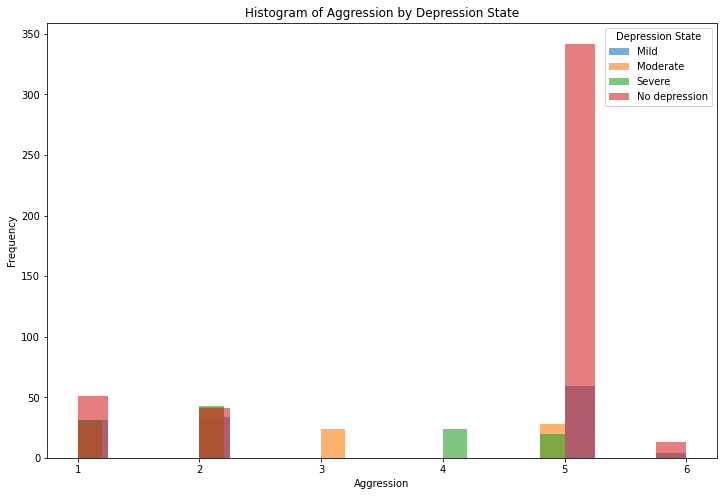

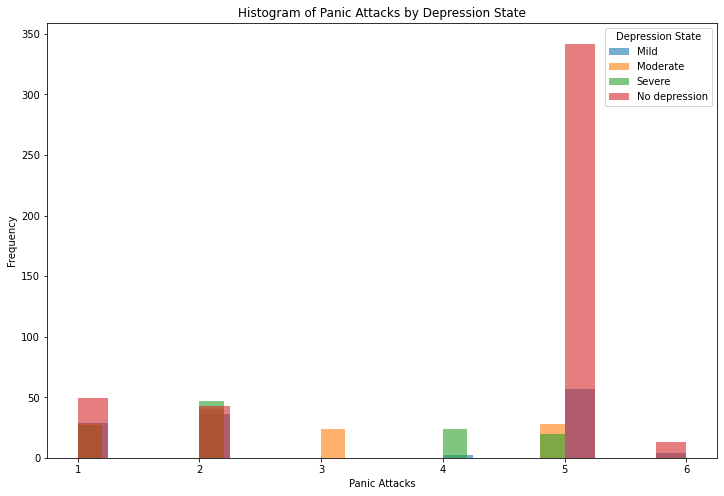

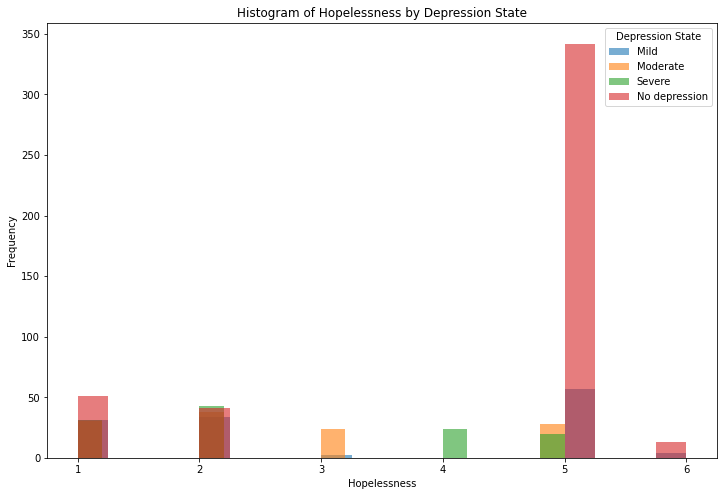

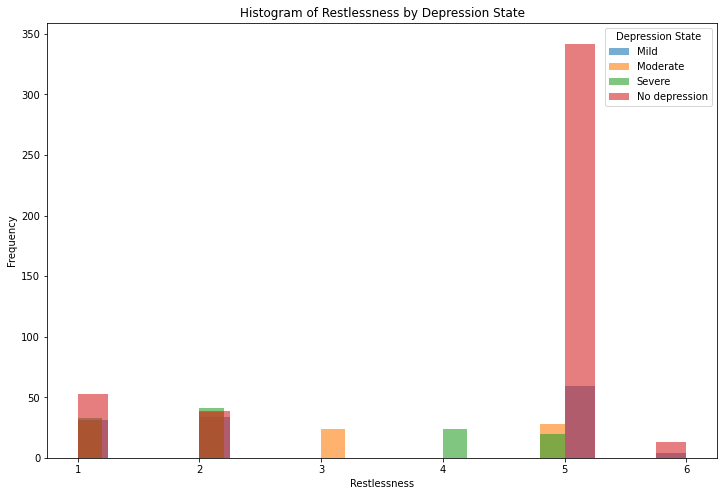

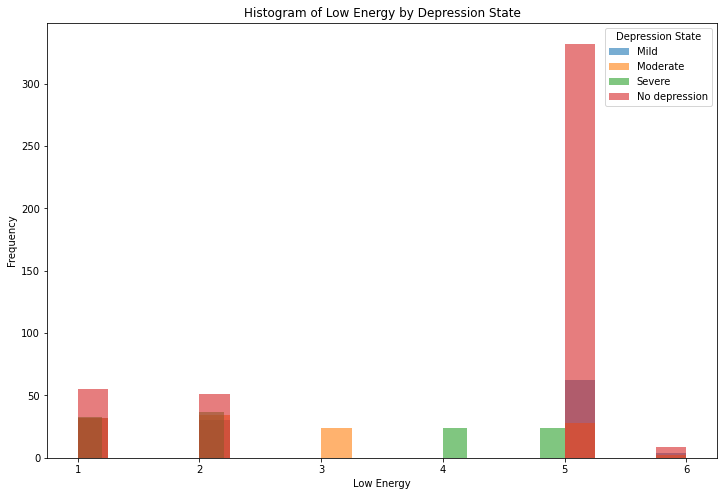

In [14]:
for col in num_cols:
    plt.figure(figsize = (12, 8))
    for state in Depression['Depression State'].unique():
        subset = Depression[Depression['Depression State'] == state]
        plt.hist(subset[col], bins = 20, alpha = 0.6, label = state)
    plt.title(f'Histogram of {col} by Depression State')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(title='Depression State')
    plt.show()

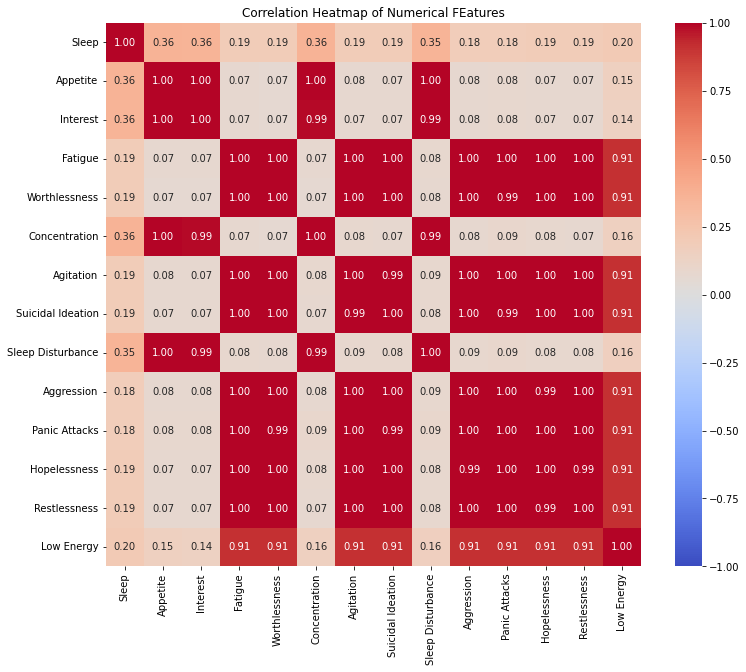

In [15]:
corr_matrix = Depression[num_cols].corr()
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix,annot = True, cmap = 'coolwarm',fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap of Numerical FEatures')
plt.show()

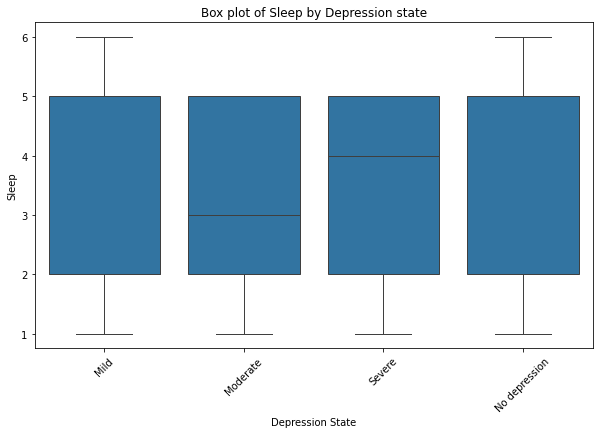

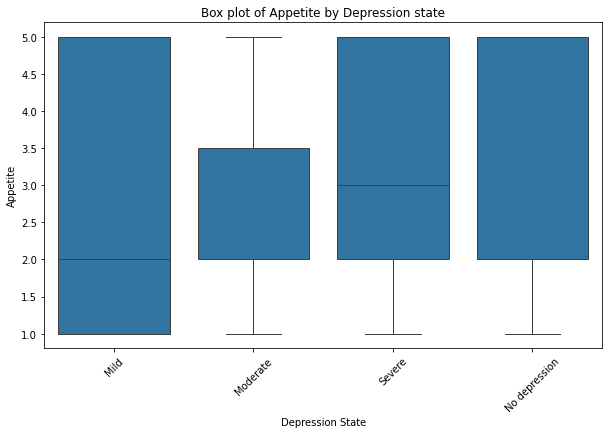

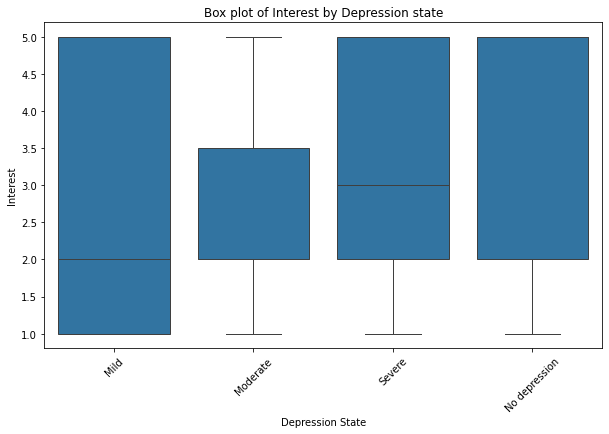

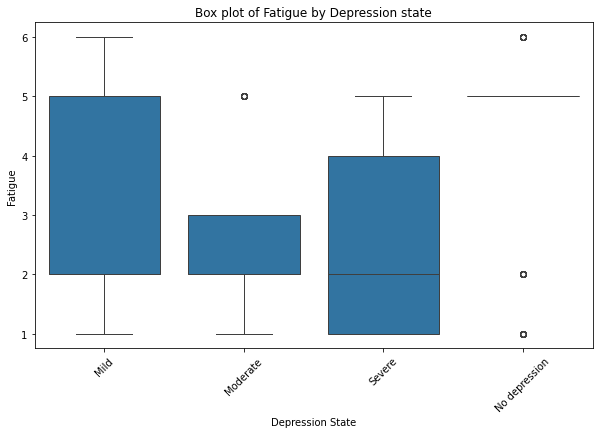

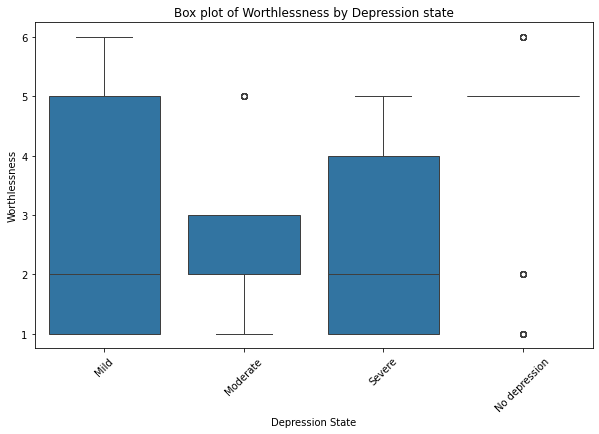

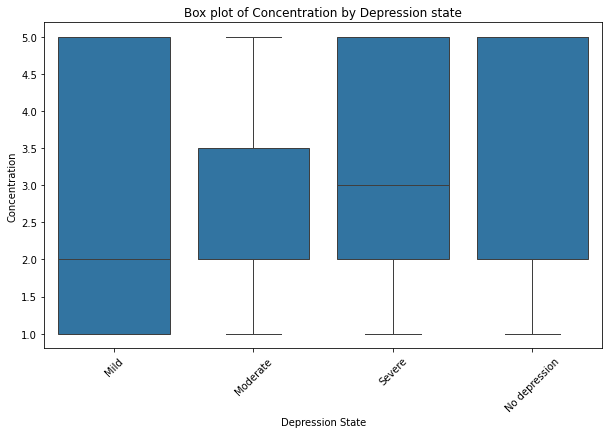

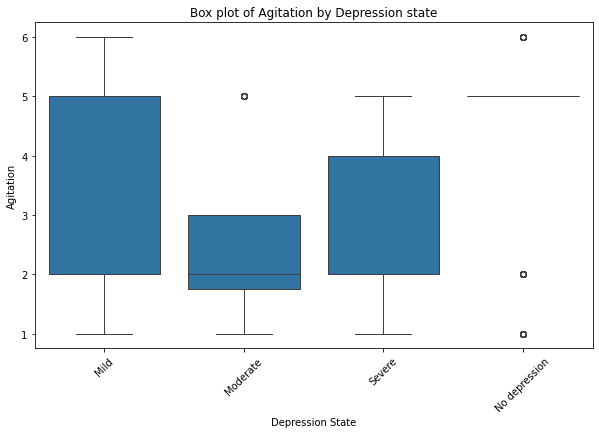

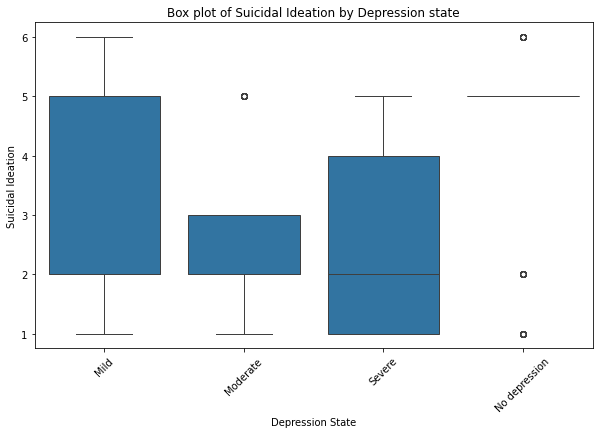

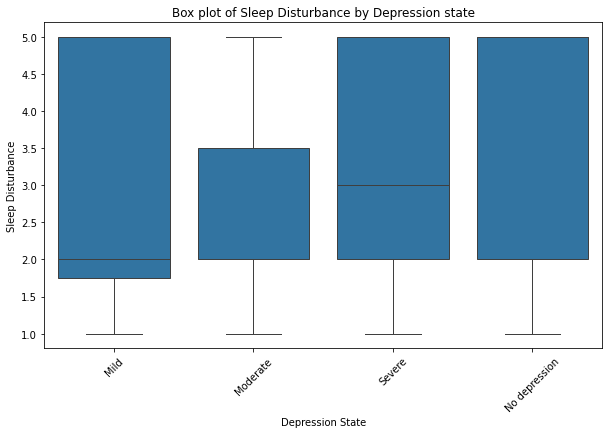

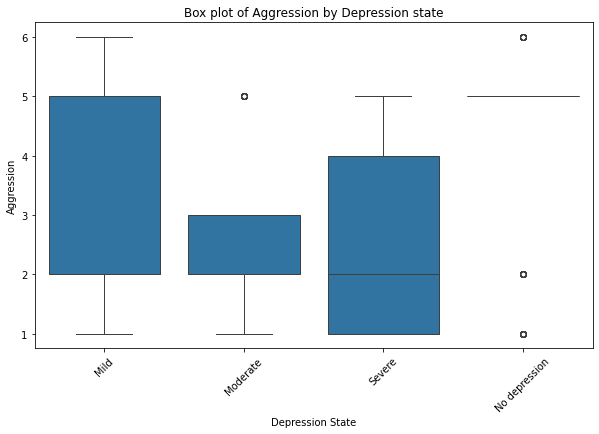

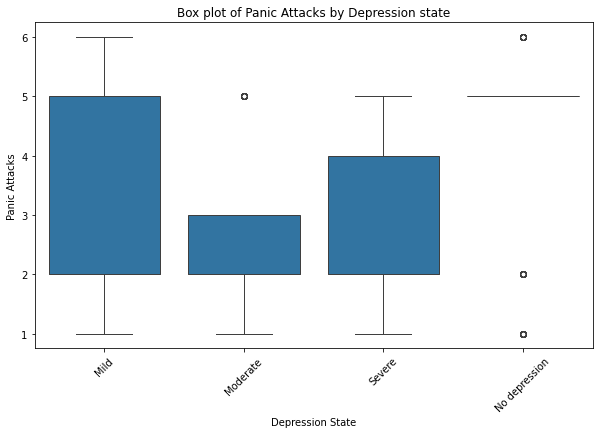

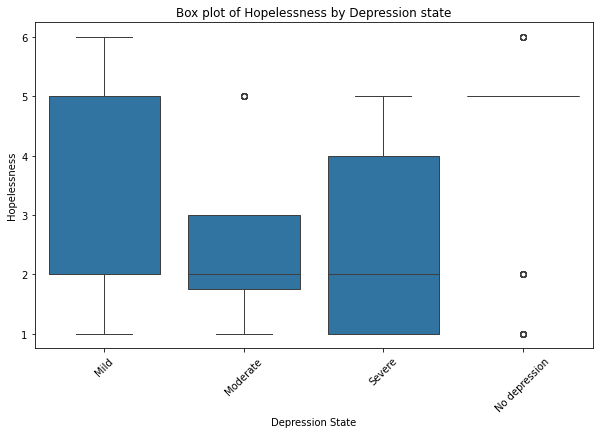

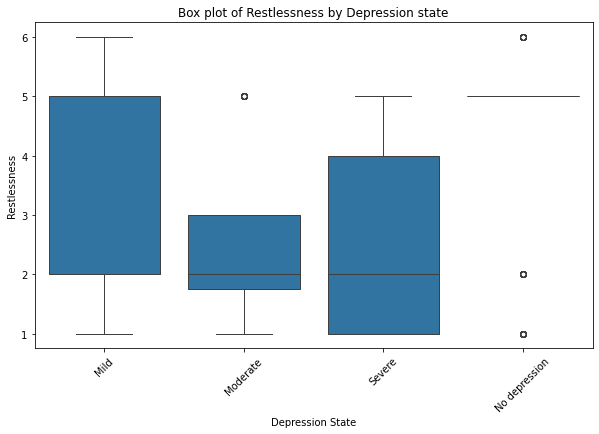

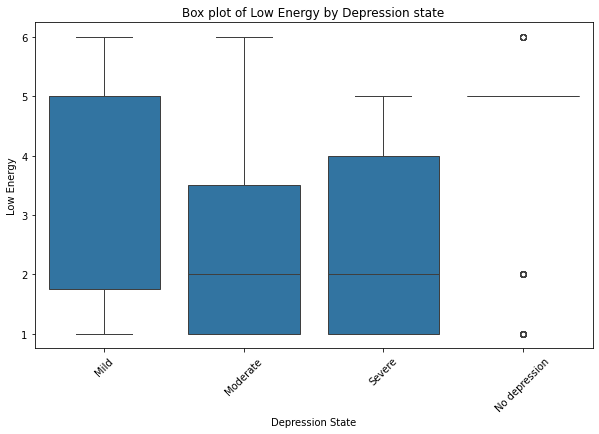

In [16]:
for col in num_cols:
    plt.figure(figsize = (10,6))
    sns.boxplot(x = 'Depression State', y = Depression[col], data = Depression)
    plt.title(f'Box plot of {col} by Depression state')
    plt.xticks(rotation = 45)
    plt.show()